In [ ]:
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install sklearn
!pip install matplotlib

/Users/mcolley/houseprice_prediction/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


Epoch 1/100


/Users/mcolley/houseprice_prediction/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37223555072.0000 - mae: 176080.2500 - val_loss: 38149103616.0000 - val_mae: 179919.9844
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38659915776.0000 - mae: 180111.7500 - val_loss: 37646319616.0000 - val_mae: 178533.2656
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36585271296.0000 - mae: 174482.1406 - val_loss: 36011487232.0000 - val_mae: 173948.1094
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33110867968.0000 - mae: 166704.5000 - val_loss: 32602550272.0000 - val_mae: 163984.3438
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31598893056.0000 - mae: 160417.5625 - val_loss: 27267461120.0000 - val_mae: 147056.0000
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25140205568.0000 - mae: 138227.2969 - val_loss: 20632393728.0000 - val_mae: 122913.3047
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18351759360.0000 - mae: 113024.3516 - val_loss: 14055665664.0000 - val_

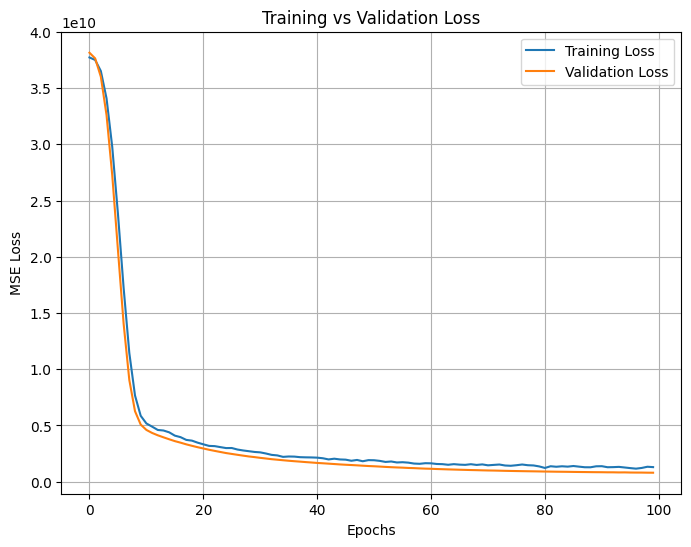

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


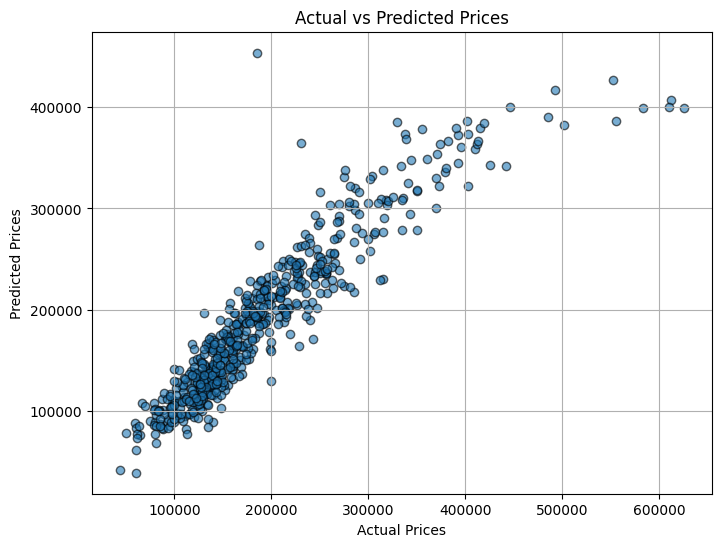

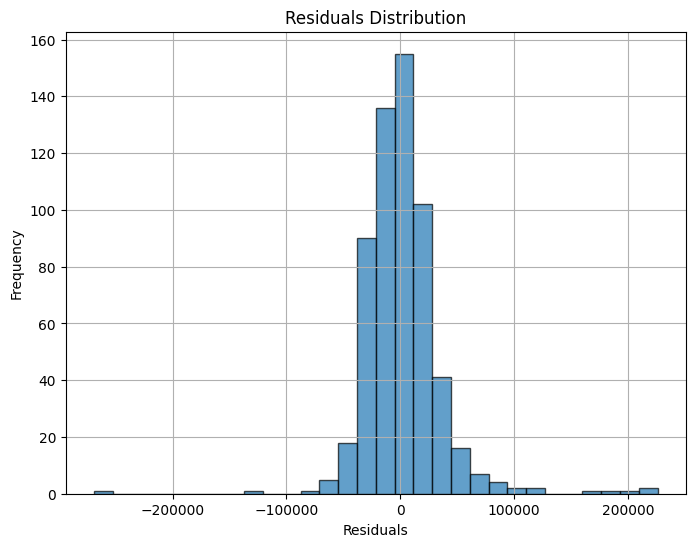

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Ensure inline plots display correctly (for Jupyter Notebook)
%matplotlib inline

# Load dataset
data = pd.read_csv('AmesHousing.csv')

# Preprocessing
# Handle missing values
# Handle missing values in numerical columns only
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

#data = data.dropna(axis=1, thresh=0.7 * len(data))  # Drop columns with >30% missing
#data.fillna(data.median(), inplace=True)  # Impute remaining missing values with median

# Separate features and target
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Encode categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Apply preprocessing to features
X = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build DNN model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Single output neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_loss:.2f}, Test MAE: {test_mae:.2f}")

# Visualise loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict and visualise results
predictions = model.predict(X_test).flatten()  # Flatten predictions to 1D array

# Scatter plot: Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, edgecolors='k')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# Histogram: Residuals (errors)
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True)
plt.show()
